In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import KFold, cross_val_score, train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving glass.csv to glass.csv


In [3]:
raw_data = pd.read_csv('glass.csv')
raw_data

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]

#Data Exploration

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
raw_data.describe()

RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1.000000  
25%      8.240000    0.000000    0.000000    1.000000  
50%      8.600000    0.000000    0.000000    2.000000  
75%      9.172500    0.000000    0.100000    3.000000  
max     16.190000    3.150000    0.510000    7.000000

In [6]:
raw_data['Type'].value_counts().sort_index(ascending=True)

1    70
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64

In [7]:
raw_data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [8]:
raw_data[raw_data.duplicated()].sum()

RI       1.52213
Na      14.21000
Mg       3.82000
Al       0.47000
Si      71.77000
K        0.11000
Ca       9.57000
Ba       0.00000
Fe       0.00000
Type     1.00000
dtype: float64

#Data Visualization

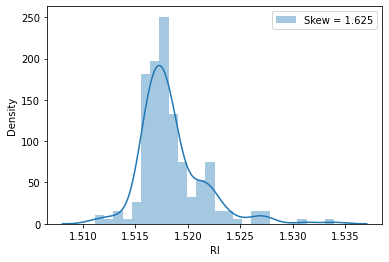

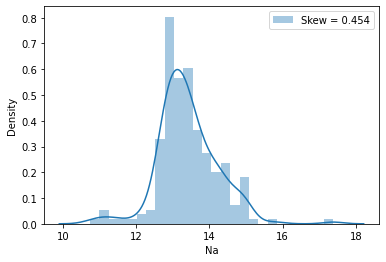

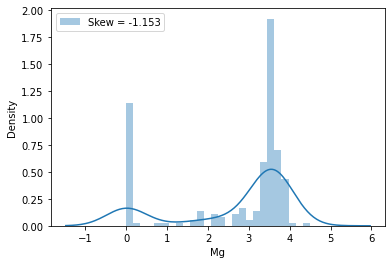

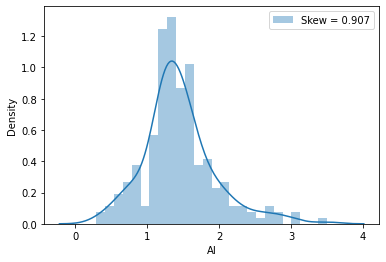

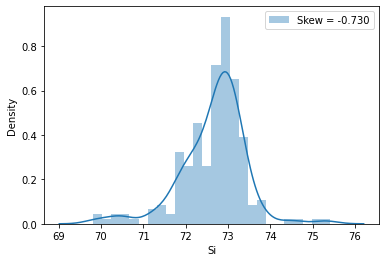

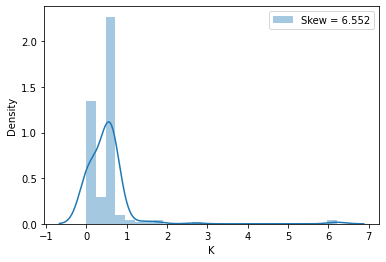

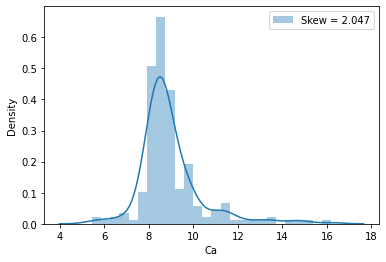

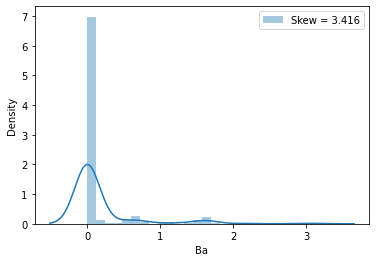

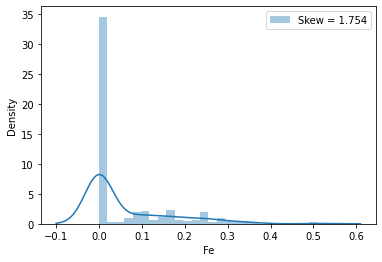

In [9]:
data = raw_data.columns[:-1].tolist()
for i in data:
    skew = raw_data[i].skew()
    sns.distplot(raw_data[i], kde= True, label='Skew = %.3f' %(skew), bins=26)
    plt.legend(loc='best')
    plt.show()

In [10]:
glass = raw_data.copy()
list(glass)

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

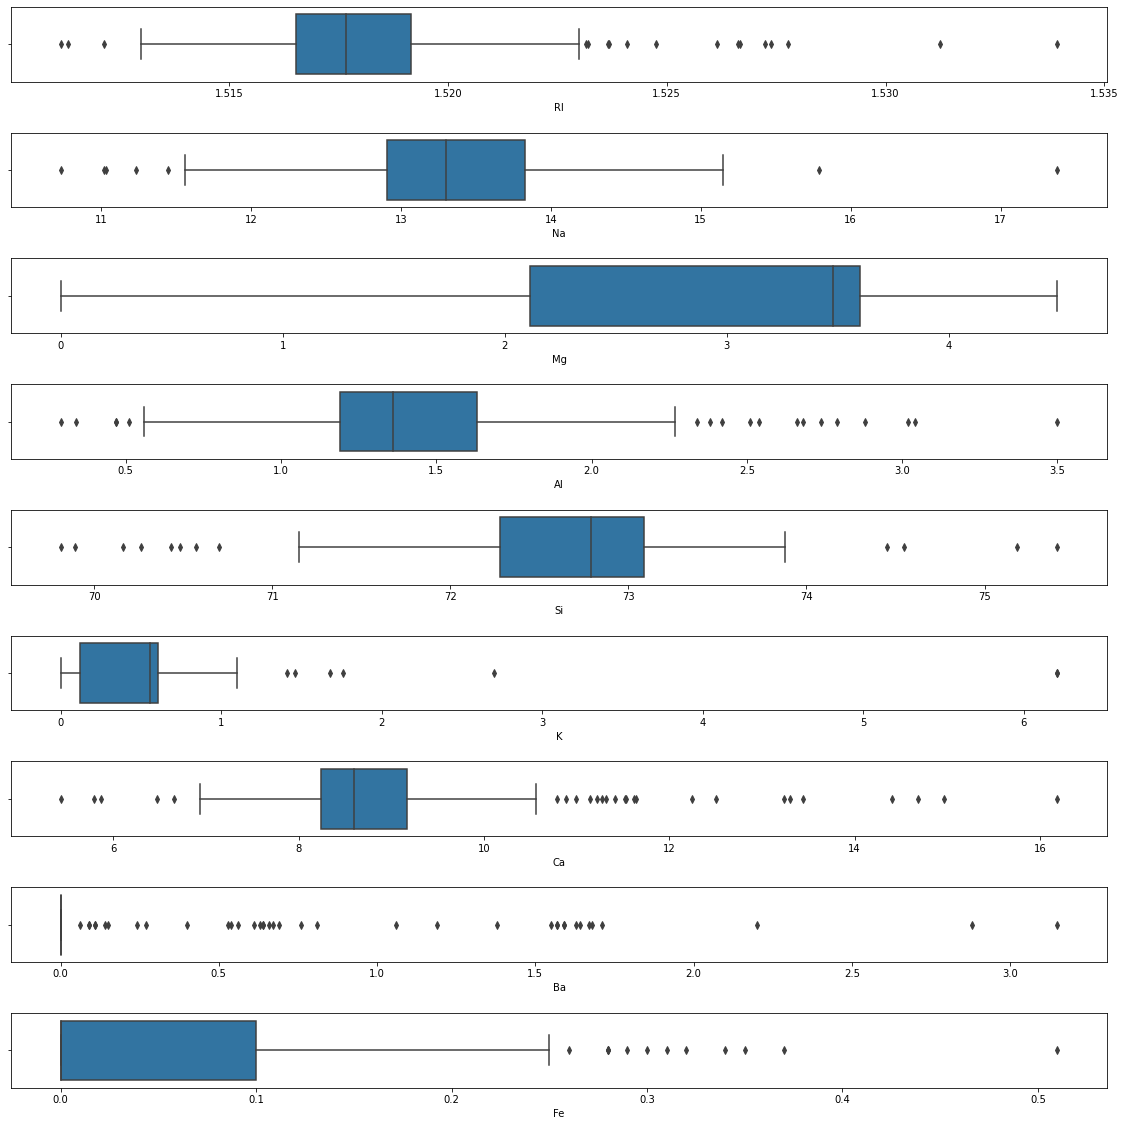

In [11]:
fig, axes=plt.subplots(9,1,figsize=(16,16),sharex=False,sharey=False)
sns.boxplot(x='RI',data=glass,ax=axes[0])
sns.boxplot(x='Na',data=glass,ax=axes[1])
sns.boxplot(x='Mg',data=glass,ax=axes[2])
sns.boxplot(x='Al',data=glass,ax=axes[3])
sns.boxplot(x='Si',data=glass,ax=axes[4])
sns.boxplot(x='K',data=glass,ax=axes[5])
sns.boxplot(x='Ca',data=glass,ax=axes[6])
sns.boxplot(x='Ba',data=glass,ax=axes[7])
sns.boxplot(x='Fe',data=glass,ax=axes[8])
plt.tight_layout(pad=2.0)

In [12]:
from collections import Counter
features = raw_data.columns[:-1].tolist()

def outlier(df):
  outlier_indices = []

  for col in glass.columns.tolist():
      Q1 = np.percentile(glass[col], 25)
      Q3 = np.percentile(glass[col],75)
      IQR = Q3 - Q1
      outlier_step = 1.5 * IQR
      
      outlier_col = glass[(glass[col] < Q1 - outlier_step) | (glass[col] > Q3 + outlier_step )].index
      outlier_indices.extend(outlier_col)
      
  outlier_indices = Counter(outlier_indices)        
  outliers = list( k for k, v in outlier_indices.items() if v > 2 )
  print("Total of {} outliers detected: ".format(len(outliers)),outliers)

  return outliers  

#Data Visualization

In [13]:
!pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 59.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.4/763.4 KB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 KB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 76.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 14.


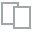
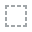
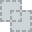
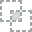
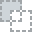
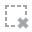
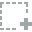
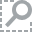
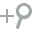
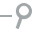
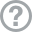
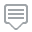
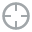
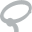
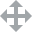
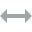
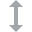
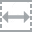
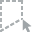
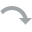
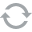
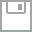
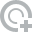
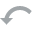
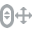
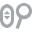
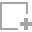
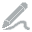
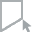
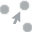
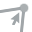
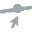

In [14]:
from dataprep.eda import plot
plot(glass)

<Figure size 1152x1152 with 0 Axes>

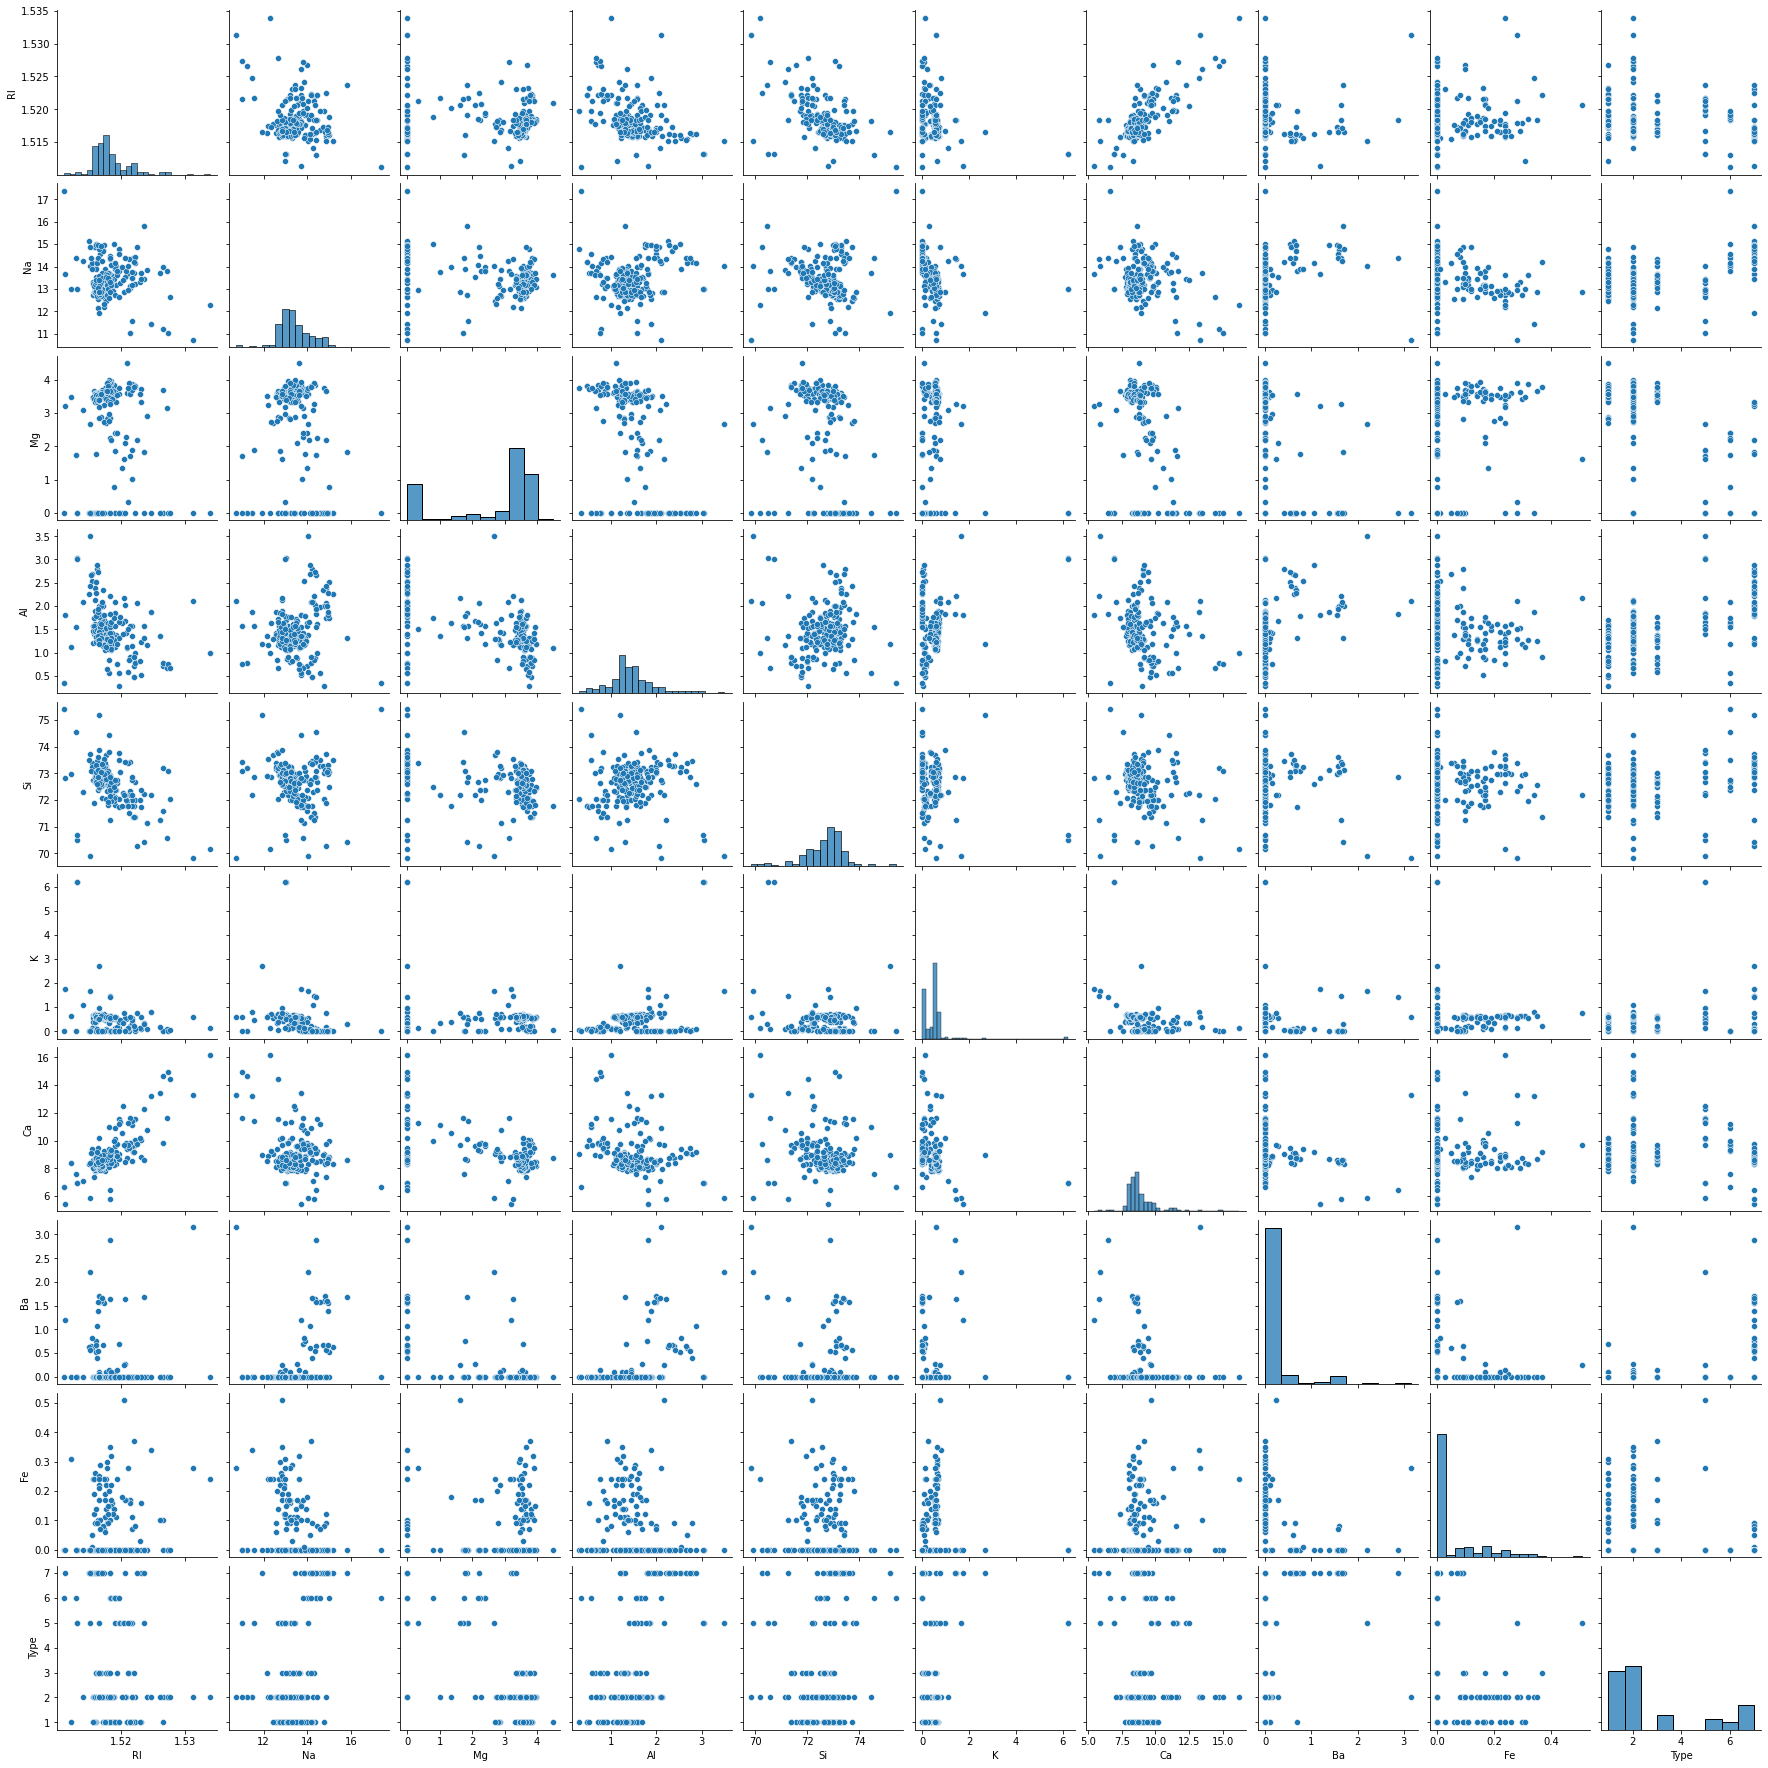

In [15]:
plt.figure(figsize=(16,16))
sns.pairplot(glass)
plt.show()

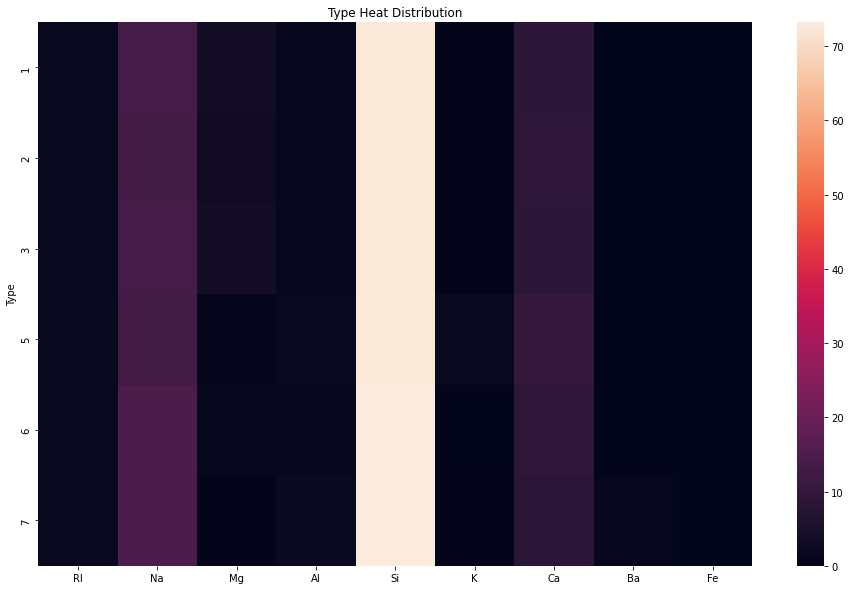

In [16]:
plt.figure(figsize = (16,10))
sns.heatmap(glass.groupby(by='Type').mean())
plt.title("Type Heat Distribution")
plt.show()

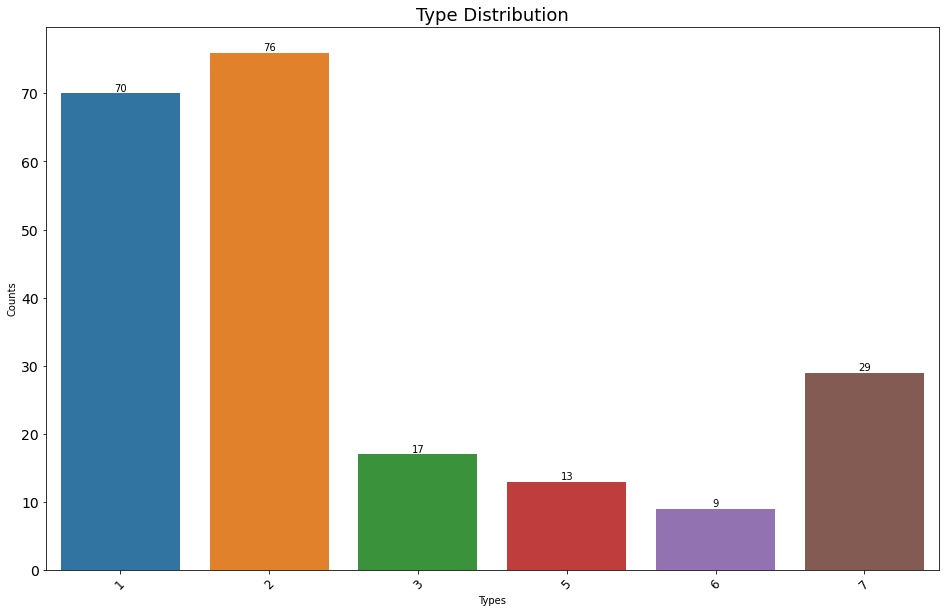

In [17]:
plt.figure(figsize = (16,10))
ax = sns.barplot(x = glass['Type'].value_counts().index.tolist(), y = glass['Type'].value_counts().tolist())
plt.yticks(fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title("Type Distribution",  fontsize = 18)
plt.xlabel('Types')
plt.ylabel('Counts')
for i in ax.containers:
    ax.bar_label(i,)

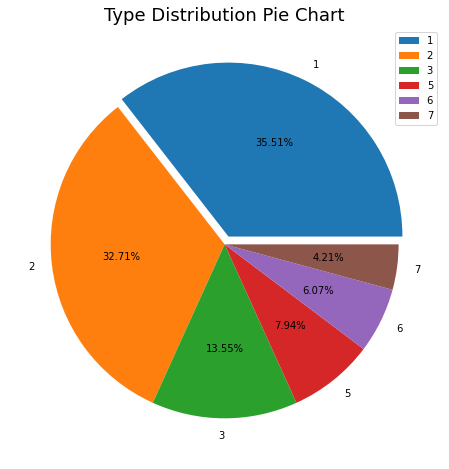

In [18]:
plt.figure(figsize = (12,8))
plt.pie(glass['Type'].value_counts(),
       labels = glass.Type.unique(),
       explode = [0.05,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%')
plt.legend()
plt.title("Type Distribution Pie Chart", fontsize = 18)
plt.show()

#Data Transformation

In [19]:
o = outlier(raw_data[features])
glass_df = raw_data.drop(o).reset_index(drop=True)
print(glass_df.shape)
glass_df.head()

Total of 25 outliers detected:  [103, 105, 106, 107, 110, 111, 184, 185, 189, 163, 171, 172, 191, 192, 195, 196, 197, 198, 199, 202, 208, 209, 201, 186, 207]
(189, 10)


RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

Box-Cox transformation for outlier removed dataset

In [20]:
# Box-Cox transformation for outlier removed dataset
from scipy.stats import boxcox
boxcox_data = []

for i in features:
    bc_transformed, _ = boxcox(glass_df[i]+1)
    boxcox_data.append(bc_transformed)

boxcox_data = np.column_stack(boxcox_data)
bc = pd.DataFrame(data=boxcox_data, columns=features)
bc['Type'] = glass_df['Type']
bc.describe()

RI          Na          Mg          Al            Si  \
count  1.890000e+02  189.000000  189.000000  189.000000  1.890000e+02   
mean   6.459654e-04    0.780721   31.662745    1.605878  1.903187e+26   
std    1.087082e-19    0.001690   15.622371    0.469786  2.225648e+25   
min    6.459654e-04    0.773374    0.000000    0.302322  1.156509e+26   
25%    6.459654e-04    0.779539   23.654890    1.369248  1.761622e+26   
50%    6.459654e-04    0.780494   38.034897    1.575799  1.923515e+26   
75%    6.459654e-04    0.781672   40.803443    1.853590  2.037687e+26   
max    6.459654e-04    0.784879   70.924449    2.843953  2.730696e+26   

                K            Ca          Ba          Fe        Type  
count  189.000000  1.890000e+02  189.000000  189.000000  189.000000  
mean     0.678151  1.945260e-01    0.007418    0.020088    2.417989  
std      0.428477  6.372560e-07    0.020710    0.028997    1.818900  
min      0.000000  1.945235e-01    0.000000    0.000000    1.000000  
25%      0.208314  1.945256e-01    0.000000    0.000000    1.000000  
50%      0.855584  1.945260e-01    0.000000    0.000000    2.000000  
75%      0.963995  1.945264e-01    0.000000    0.052799    3.000000  
max      2.352345  1.945276e-01    0.069485    0.071663    7.000000

Box-Cox transformation for raw dataset

In [21]:
# Box-Cox transformation for raw dataset
from scipy.stats import boxcox
boxcox_data1 = []

for i in features:
    bc_transformed1, _ = boxcox(glass[i]+1)
    boxcox_data1.append(bc_transformed1)

boxcox_data1 = np.column_stack(boxcox_data1)
bc1 = pd.DataFrame(data=boxcox_data1, columns=features)
bc1['Type'] = glass['Type']
bc1.describe()

RI          Na          Mg          Al            Si  \
count  2.140000e+02  214.000000  214.000000  214.000000  2.140000e+02   
mean   8.757099e-04    2.099609    9.485638    0.875325  2.976464e+22   
std    1.086744e-19    0.034261    5.466530    0.200457  3.830370e+21   
min    8.757099e-04    1.973425    0.000000    0.254745  1.797280e+22   
25%    8.757099e-04    2.079212    5.231418    0.784872  2.770766e+22   
50%    8.757099e-04    2.096185   12.350189    0.859826  3.024296e+22   
75%    8.757099e-04    2.118042   13.129628    0.968461  3.181883e+22   
max    8.757099e-04    2.245333   19.718349    1.507653  4.698007e+22   

                K          Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  214.000000  
mean     0.278097    0.703271    0.019170    0.018646    2.780374  
std      0.172111    0.005530    0.042242    0.027484    2.103739  
min      0.000000    0.677781    0.000000    0.000000    1.000000  
25%      0.109219    0.700679    0.000000    0.000000    1.000000  
50%      0.358093    0.702500    0.000000    0.000000    2.000000  
75%      0.380233    0.705086    0.000000    0.051278    3.000000  
max      0.870912    0.721187    0.119372    0.067889    7.000000

As we can observe, the deviation in raw dataset is greater than outliers removed dataset. And also outliers removed dataset has better normal distribution than raw dataset. **Hence, we continue with outliers removed dataset.**

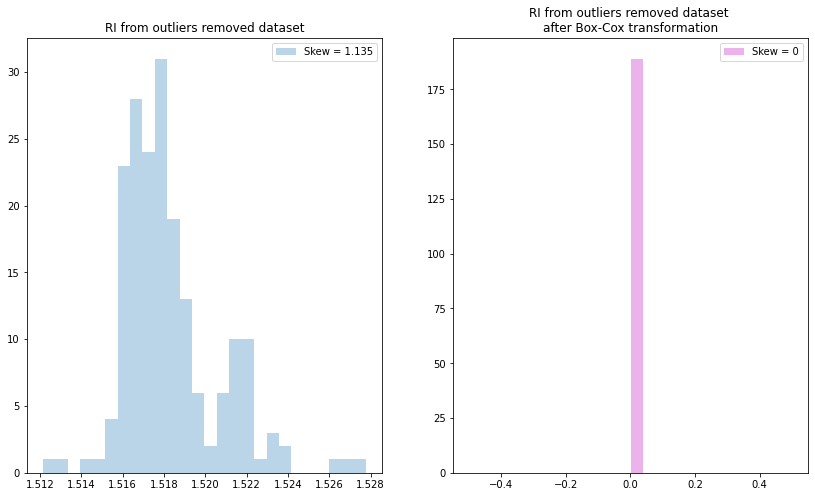

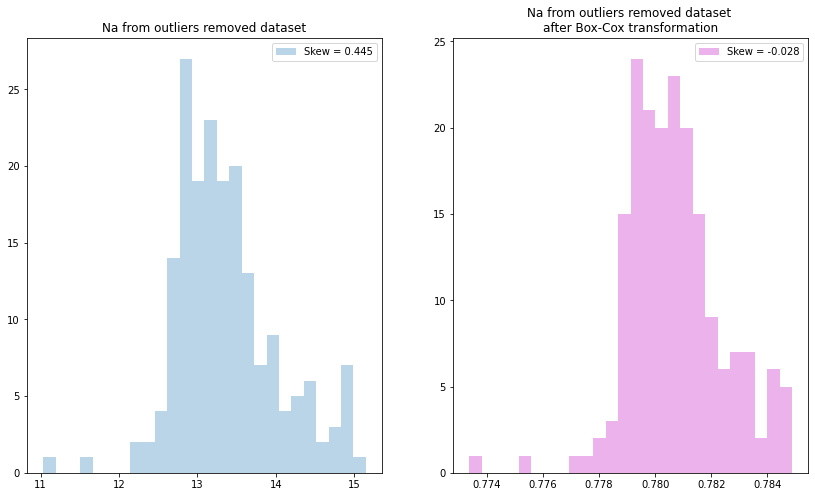

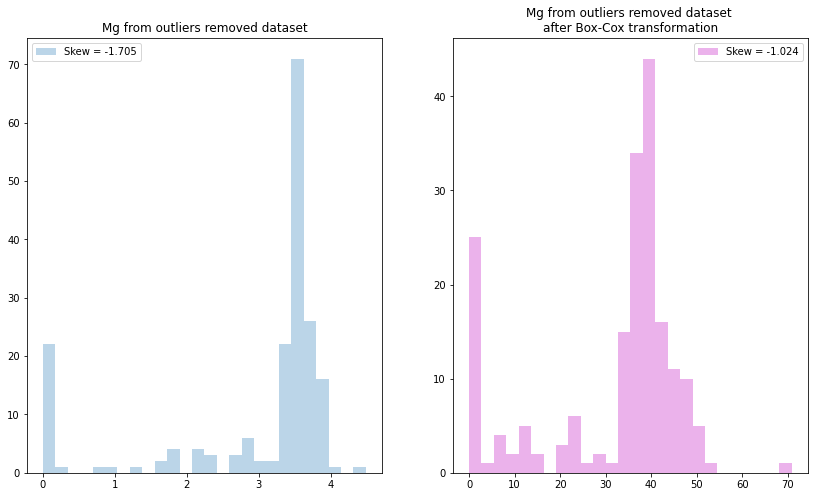

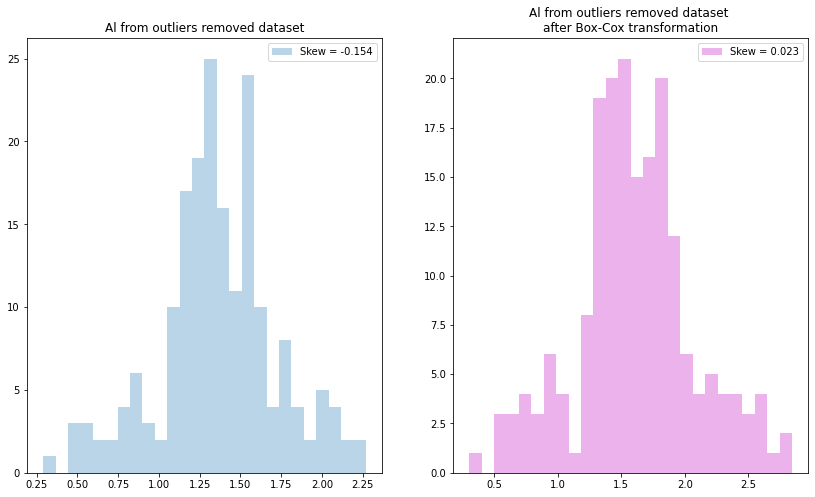

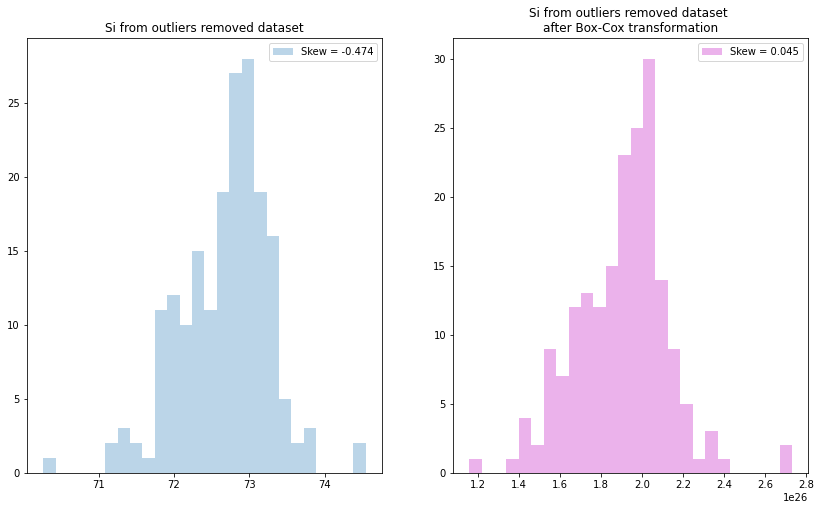

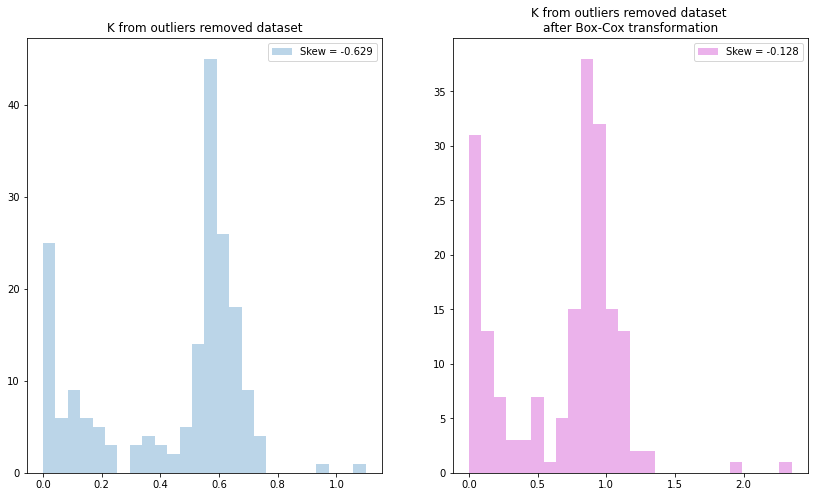

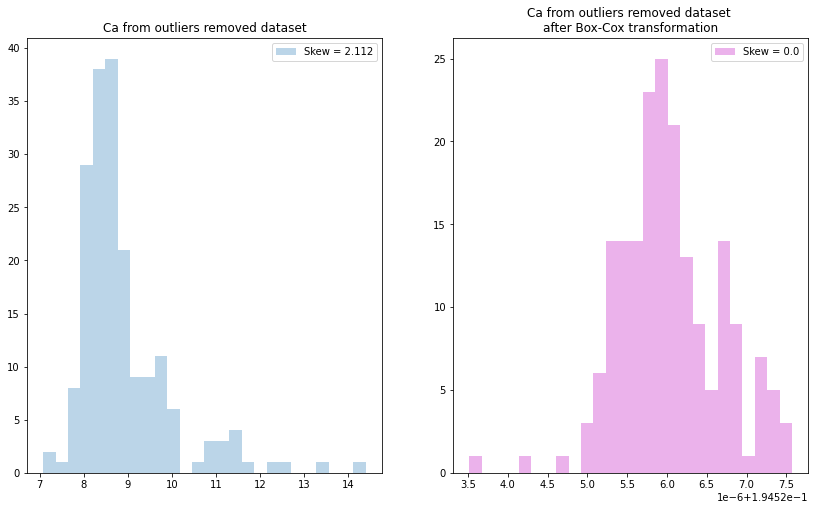

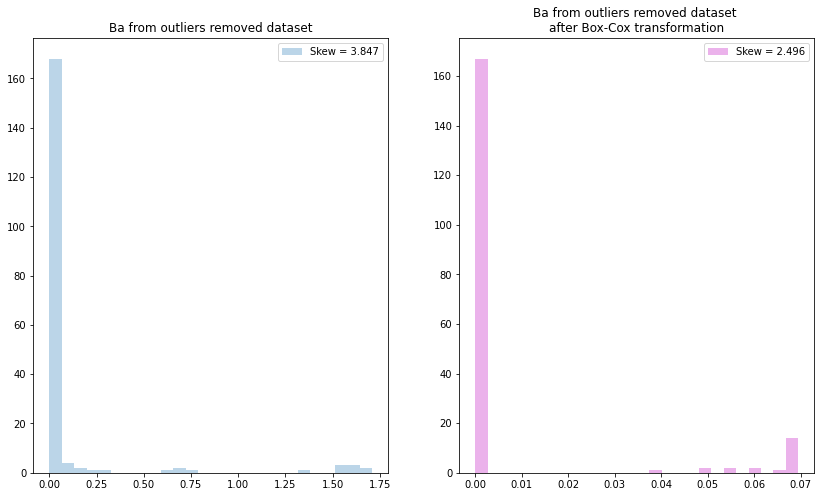

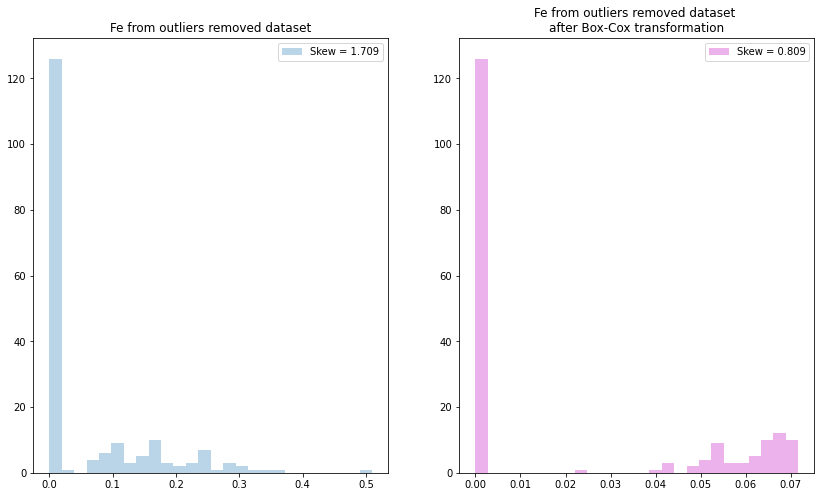

In [22]:
for feature in features:
    fig, ax = plt.subplots(1,2,figsize=(14,8))    
    ax[0].hist(glass_df[feature], bins=26, alpha=0.3, label='Skew = %s' %(str(round(glass_df[feature].skew(),3))) )
    ax[0].set_title(str(feature)+' from outliers removed dataset')   
    ax[0].legend()
    ax[1].hist(bc[feature], color='m', bins=26, alpha=0.3, label='Skew = %s' %(str(round(bc[feature].skew(),3))) )
    ax[1].set_title(str(feature)+' from outliers removed dataset '+'\n'+'after Box-Cox transformation')
    ax[1].legend()
    plt.show()

**Hence, all the features are less skewed after a Box-Cox transform.**

#Splitting data into train and test dataset

In [23]:
x = glass_df.drop('Type',axis=1)
y = glass_df[['Type']]

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [25]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ",x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of X_train:  (132, 9)
Shape of X_test:  (57, 9)
Shape of y_train:  (132, 1)
Shape of y_test:  (57, 1)


#Standardizing the variables

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#Choosing the best value of K using Grid search

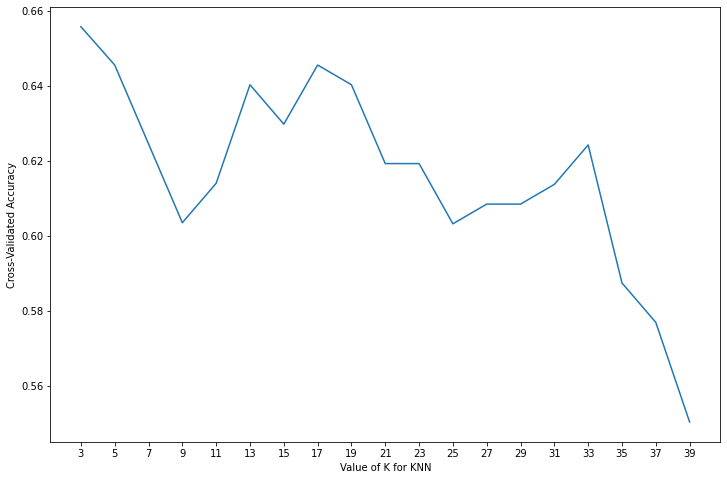

Best K value for {'n_neighbors': 3}
Best score is 0.6558479532163742


In [27]:
from sklearn.model_selection import cross_val_score, GridSearchCV
# choose k between 1 to 40
k_range = np.array([2*i+1 for i in range(1,20)])
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv =10)
grid.fit(x, y)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.figure(figsize=(12,8))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.show()

print('Best K value for',grid.best_params_)
print('Best score is',grid.best_score_)

In [28]:
k = pd.DataFrame(k_scores).sort_values(0,ascending=False).head(10)

K-value VS Accuracy plot

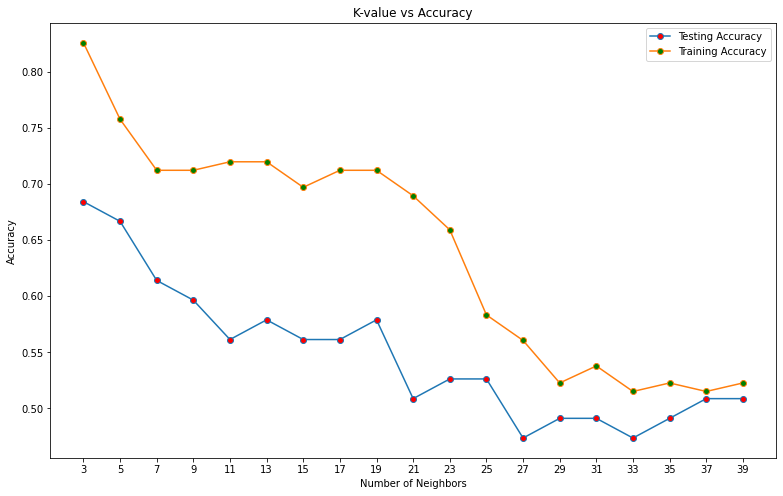

In [29]:
train_accuracy = []
test_accuracy = []

k_range = [i for i in range(3,40, 2)]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train,y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test,y_test))
    
plt.figure(figsize=[13,8])
plt.plot(k_range, test_accuracy, label = 'Testing Accuracy', marker='o', markerfacecolor='r')
plt.plot(k_range, train_accuracy, label = 'Training Accuracy', marker='o', markerfacecolor='g')
plt.legend()
plt.title('K-value vs Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.show()

K-value VS Error plot

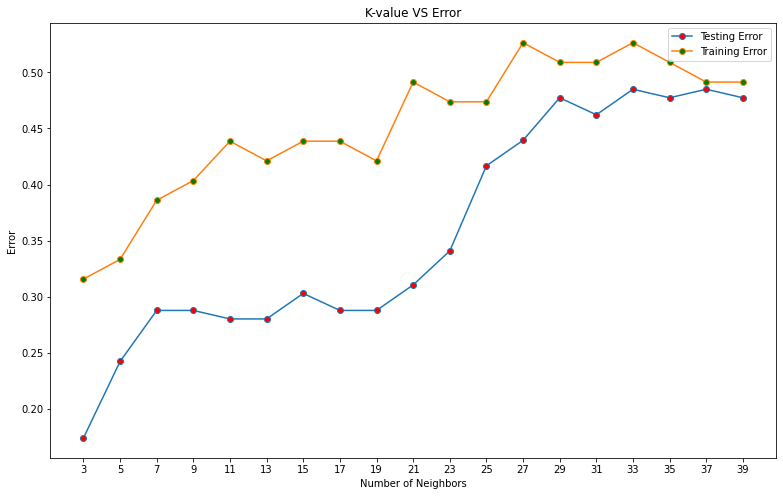

In [30]:
error1= []
error2= []
k_range = [i for i in range(3,40, 2)]
for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred1= knn.predict(x_train)
    y_pred1 = y_pred1.reshape(132,1)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(x_test)
    y_pred2 = y_pred2.reshape(57,1)
    error2.append(np.mean(y_test!= y_pred2))
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_range, error1, label = 'Testing Error', marker='o', markerfacecolor='r')
plt.plot(k_range, error2, label = 'Training Error', marker='o', markerfacecolor='g')
plt.legend()
plt.title('K-value VS Error')
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')
plt.xticks(k_range)
plt.show()

#KNN: K-Nearest Neighbours

**1) For K=3**

In [31]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('For K=3: \n')
print(confusion_matrix(y_test,pred))

For K=3: 

[[16  2  2  0  0  0]
 [ 3 16  0  2  0  0]
 [ 5  1  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  1  0  0  3  1]
 [ 1  0  0  0  0  3]]


In [32]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.64      0.80      0.71        20
           2       0.80      0.76      0.78        21
           3       0.00      0.00      0.00         6
           5       0.33      1.00      0.50         1
           6       1.00      0.60      0.75         5
           7       0.75      0.75      0.75         4

    accuracy                           0.68        57
   macro avg       0.59      0.65      0.58        57
weighted avg       0.67      0.68      0.66        57



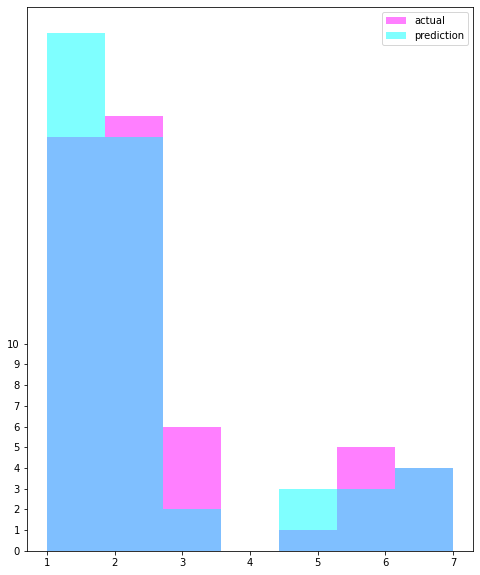

In [33]:
plt.figure(figsize = (8,10))
plt.hist(y_test, color = 'magenta', alpha = 0.5, label = 'actual', bins=7)
plt.hist(pred, color = 'aqua', alpha = 0.5, label = 'prediction', bins=7)
plt.yticks(np.arange(0,11))
plt.legend(loc = 'best')
plt.show()

**For K=5**

In [34]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('For K=3: \n')
print(confusion_matrix(y_test,pred))

For K=3: 

[[16  4  0  0  0  0]
 [ 4 16  0  1  0  0]
 [ 4  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  2  1  0  2  0]
 [ 1  0  0  0  0  3]]


In [35]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.64      0.80      0.71        20
           2       0.67      0.76      0.71        21
           3       0.00      0.00      0.00         6
           5       0.50      1.00      0.67         1
           6       1.00      0.40      0.57         5
           7       1.00      0.75      0.86         4

    accuracy                           0.67        57
   macro avg       0.63      0.62      0.59        57
weighted avg       0.64      0.67      0.63        57



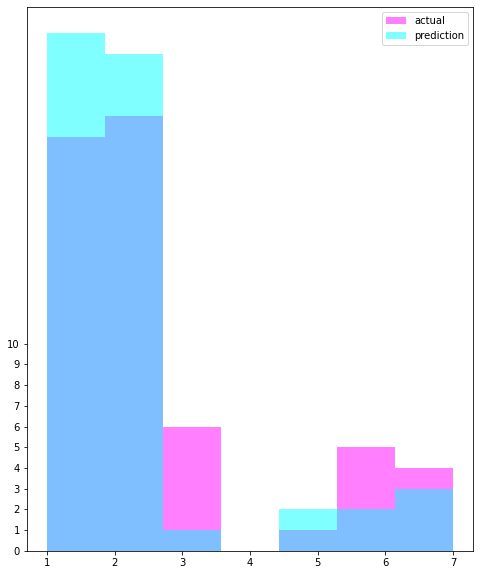

In [36]:
plt.figure(figsize = (8,10))
plt.hist(y_test, color = 'magenta', alpha = 0.5, label = 'actual', bins=7)
plt.hist(pred, color = 'aqua', alpha = 0.5, label = 'prediction', bins=7)
plt.yticks(np.arange(0,11))
plt.legend(loc = 'best')
plt.show()

**For K=17**

In [37]:
knn = KNeighborsClassifier(n_neighbors=17)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('For K=3: \n')
print(confusion_matrix(y_test,pred))

For K=3: 

[[15  5  0  0  0  0]
 [ 7 14  0  0  0  0]
 [ 4  2  0  0  0  0]
 [ 1  0  0  0  0  0]
 [ 2  1  0  2  0  0]
 [ 1  0  0  0  0  3]]


In [38]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.50      0.75      0.60        20
           2       0.64      0.67      0.65        21
           3       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         5
           7       1.00      0.75      0.86         4

    accuracy                           0.56        57
   macro avg       0.36      0.36      0.35        57
weighted avg       0.48      0.56      0.51        57



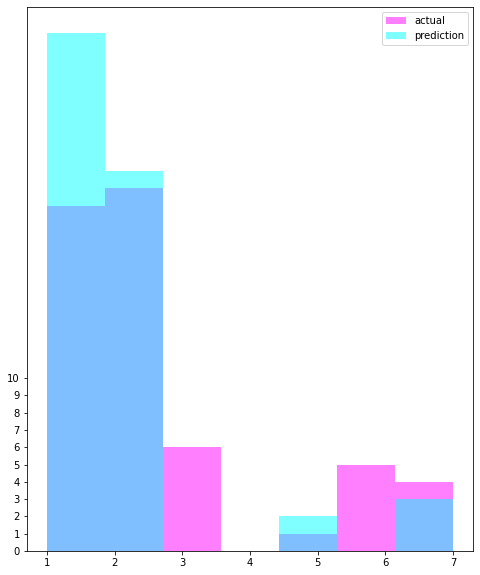

In [39]:
plt.figure(figsize = (8,10))
plt.hist(y_test, color = 'magenta', alpha = 0.5, label = 'actual', bins=7)
plt.hist(pred, color = 'aqua', alpha = 0.5, label = 'prediction', bins=7)
plt.yticks(np.arange(0,11))
plt.legend(loc = 'best')
plt.show()

#Conclusion

Out of K = 3,5,17 , the best model we get is for K = 3 (n_neighbors=3). The duplicated values and the outliers were removed from the dataset, Standard Scaler was used to increase accuracy of KNN models was greater then every value where n=3

**Hence, best fit model if for K = 3 with good accuracy and minimal errors.**